![Facial Recognition](facialrecognition.jpg)

You are a member of an elite group of data scientists, specialising in advanced facial recognition technology, this firm is dedicated to identifying and safeguarding prominent individuals from various spheres—ranging from entertainment and sports to politics and philanthropy. The team's mission is to deploy AI-driven solutions that can accurately distinguish between images of notable personalities and the general populace, enhancing the personal security of such high-profile individuals. You're to focus on Arnold Schwarzenegger, a figure whose accomplishments span from bodybuilding champion to Hollywood icon, and from philanthropist to the Governor of California. 

### **The Data**
The `data/lfw_arnie_nonarnie.csv` dataset contains processed facial image data derived from the "Labeled Faces in the Wild" (LFW) dataset, focusing specifically on images of Arnold Schwarzenegger and other individuals not identified as him. This dataset has been prepared to aid in the development and evaluation of facial recognition models. There are 40 images of Arnold Schwarzenegger and 150 of other people.

| Column Name | Description |
|-------------|-------------|
| PC1, PC2, ... PCN | Principal components from PCA, capturing key image features. |
| Label | Binary indicator: `1` for Arnold Schwarzenegger, `0` for others. |

In [1]:
# Import required libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file 
df = pd.read_csv("data/lfw_arnie_nonarnie.csv")

# Seperate the predictor and class label
X = df.drop('Label', axis=1)
y = df['Label'] 

# Split the data into training and testing sets using stratify to balance the class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

Best Model: LogisticRegression
Best Model Parameters: {'LogisticRegression__C': 1}
Best Model CV Score: 0.8288172043010752
Accuracy: 0.8158
Precision: 1.0000
Recall: 0.1250
F1 Score: 0.2222


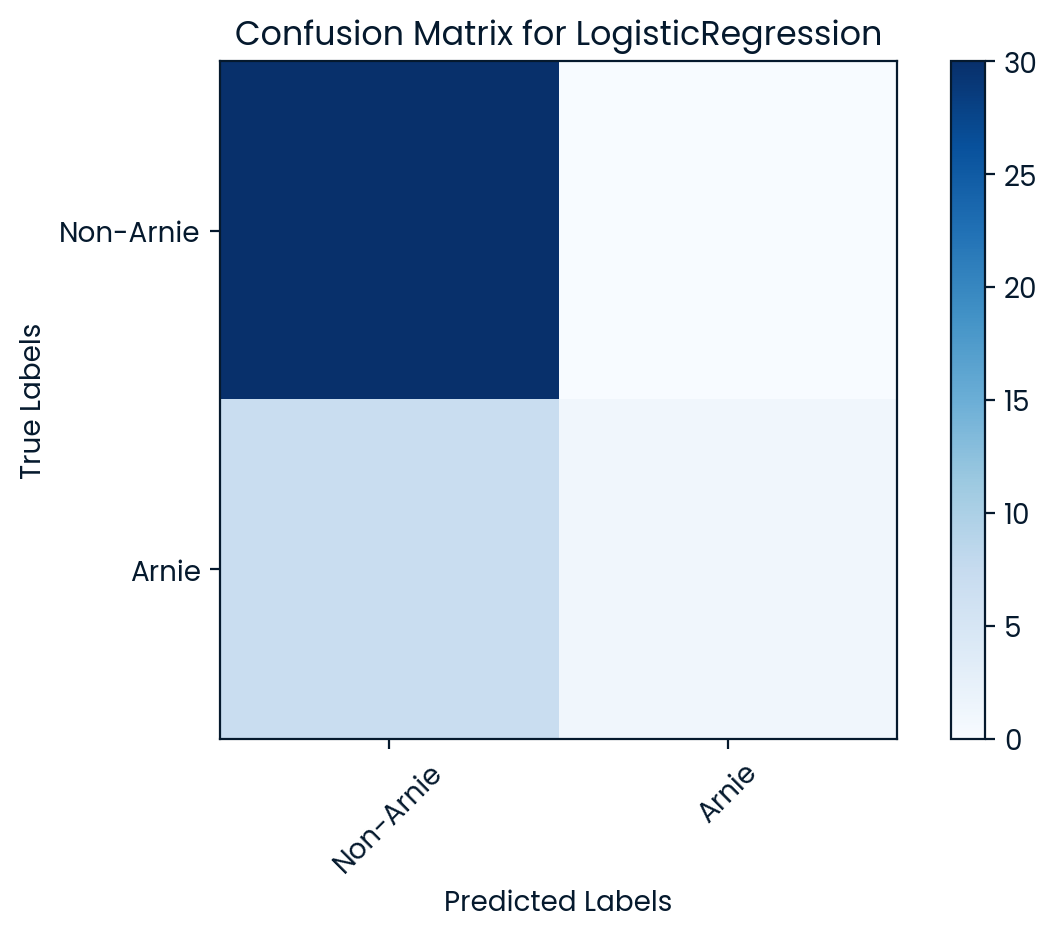

In [2]:
# Start coding here


# Import the models you want to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Store initialized models in a dictionary
# This approach allows for easy expansion and comparison of different models
models = {"LogisticRegression": LogisticRegression(), 
          "KNeighborsClassifier": KNeighborsClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier()}

# Store the model parameters in a dictionary
# Parameters are tailored to each model to explore a range of options during Grid Search
param_grid = {"LogisticRegression": {"LogisticRegression__C": [0.01, 0.1, 1, 10]},
              "KNeighborsClassifier": {"KNeighborsClassifier__n_neighbors": range(1,10)},
              "DecisionTreeClassifier": {"DecisionTreeClassifier__max_depth": [2, 5, 10],
           "DecisionTreeClassifier__min_samples_split": [2, 5, 10, 20],
           "DecisionTreeClassifier__random_state": [42]}}

# Define cross-validation parameters
# KFold is used here to ensure that our model generalizes well on unseen data
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Prepare to collect Grid Search CV results
# Grid Search helps find the best parameter combination for each model
pipe_accuracies = {}
pipe_params = {}
pipelines = {}

# Create separate pipelines for each model, loop through the models and perform GridSearchCV
# Grid Search helps find the best parameter combination for each model
# Pipelines integrate preprocessing (e.g., scaling) with the model for cleaner code and to prevent data leakage
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        (name, model)
    ])
    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring="accuracy")
    
    # Perform grid search and fit the model and store the results
    grid_search.fit(X_train, y_train)
    pipe_accuracies[name] = grid_search.best_score_
    pipe_params[name] = grid_search.best_params_
    pipelines[name] = grid_search

# Select the best model based on the best cross-validation score
best_model_name = max(pipe_accuracies)
best_model_cv_score = max(pipe_accuracies.values())
best_model_info = pipe_params[best_model_name]

# Print the best model name, parameters, and CV score
print(f"Best Model: {best_model_name}")
print(f"Best Model Parameters: {best_model_info}")
print(f"Best Model CV Score: {best_model_cv_score}")


# Compute and print key performance metrics
# These metrics help us understand the model's effectiveness in classification
y_pred = pipelines[best_model_name].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Optional: visualize the confusion matrix using Matplotlib
# This helps in understanding how well the model is predicting each class
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Arnie', 'Arnie'], rotation=45)
plt.yticks(tick_marks, ['Non-Arnie', 'Arnie'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()